# Чтение данных из csv файла

Итак суть задачи состоит в том, чтобы с помощью методов машинного обучения построить модель, которая прогнозировала бы спасется человек или нет. К задаче прилагаются 2 файла:
train.csv — набор данных на основании которого будет строиться модель (обучающая выборка)
test.csv — набор данных для проверки модели

In [1]:
# Рисовать графики сразу же
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

Чтение из csv файла
Можно читать данные из CSV файла с помощью функции read_csv. По умолчанию предполагается, что поля разделены запятыми.

Мы рассмотрим некоторые данные о велосипедистах Монреаля. 

Этот набор данных описывает, сколько людей находилось на 7 различных велосипедных дорожках Монреаля, каждый день.

Просто взять и прочитать с помощью read_csv не получится, нужно задать аргументы, которые сделают следующее:

Изменят разделитель на ;

Изменят кодировку на 'latin1' (по умолчанию считается 'utf8')

Обработают даты в колонке 'Date'

Скажут, что сначала идёт день, а потом месяц (формат YYYY-DD-MM)

Изменят индекс на значения в колонке 'Date'

In [2]:
data='C:/Users/User/Documents/Python Scripts/'

In [4]:
fixed_df = pd.read_csv(data+'bikes.csv',
                       sep=';', encoding='latin1',
                       parse_dates=['Date'], dayfirst=True,
                       index_col='Date')
fixed_df[:3]

IOError: File C:/Users/User/Documents/Python Scripts/bikes.csv does not exist

# Выбор колонок


Когда вы обрабатываете CSV с помощью pandas, вы получаете объект под названием DataFrame, который состоит из строк и столбцов. Вы можете получать столбцы таким же образом, каким получаете элементы словаря.

In [8]:
fixed_df['Berri 1'][:10]

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
2012-01-06    146
2012-01-07     98
2012-01-08     95
2012-01-09    244
2012-01-10    397
Name: Berri 1, dtype: int64

# Графики

 Просто добавьте .plot() в конец! 

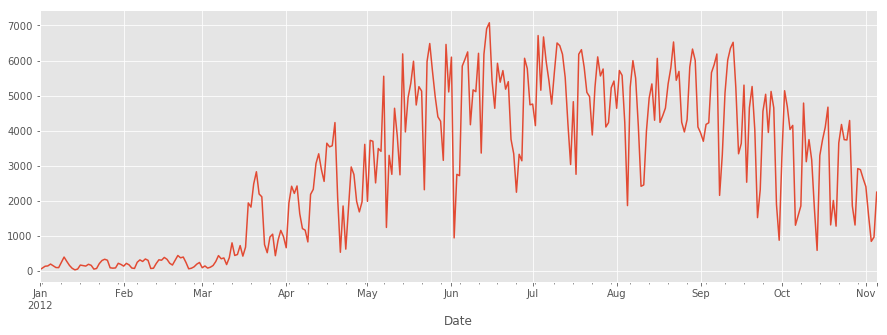

In [10]:
fixed_df['Berri 1'].plot()

Мы видим, что все велосипедные дорожки ведут себя в основном одинаково - если это плохой день для велосипедистов, то это плохой день везде.

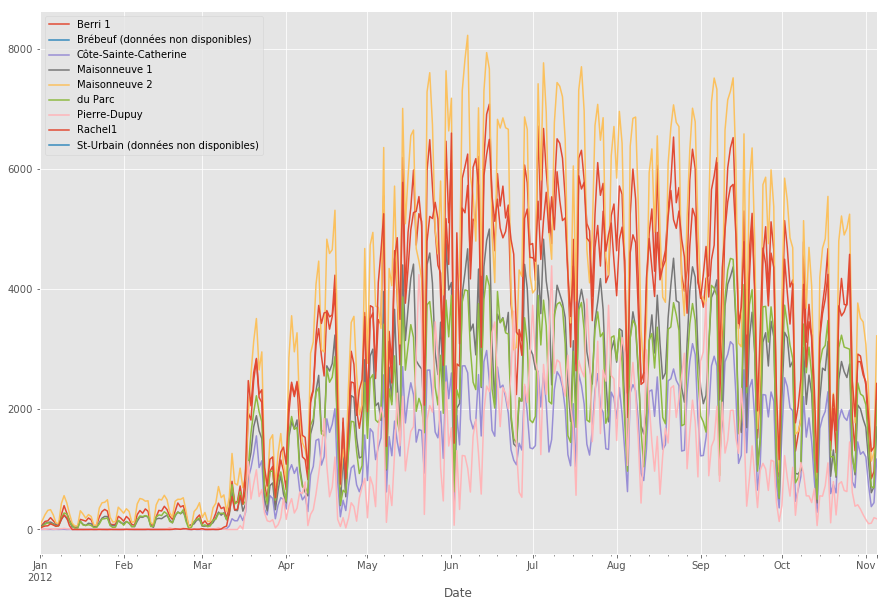

In [11]:
fixed_df.plot(figsize=(15, 10))

Используем новый набор данных, чтобы показать, как быть с большими объёмами данных. Это данные о 311 сервисных запросов (или жалоб) жителей

In [14]:
complaints = pd.read_csv('C:/Users/User/Documents/Python Scripts/311-service-requests.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


При печати большого dataframe, будут показаны только первые несколько строк.

Для получения первых 5 строк dataframe, мы можем использовать срез: df[:5].

In [15]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


Выбор строк и столбцов

In [17]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

Выбор нескольких столбцов

Что если мы хотим знать только тип жалобы и район, а остальное нам неинтересно? Pandas позволяет легко выбрать подмножество столбцов: просто проиндексируйте списком столбцов.

In [18]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


Какой самый частый тип жалобы? Это очень простой вопрос для pandas! Используем метод .value_counts():

In [19]:
complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Taxi Complaint                    

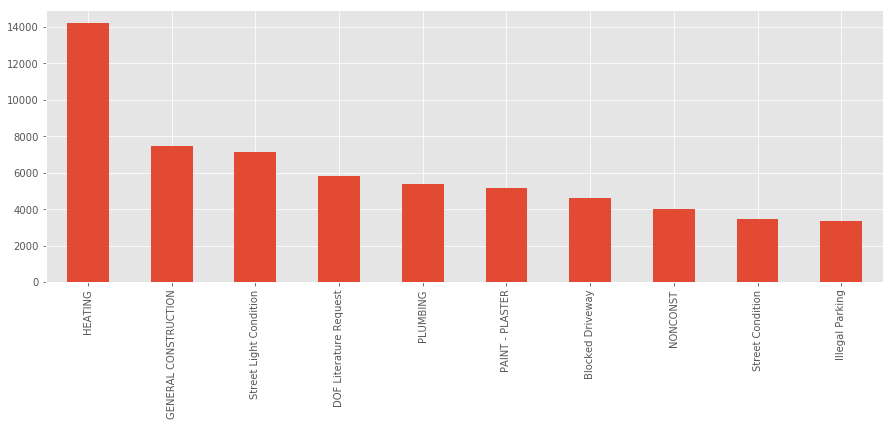

In [22]:
complaint_counts = complaints['Complaint Type'].value_counts()

complaint_counts[:10].plot(kind='bar')

# Объединение и группировка данных

Вернемся к нашему набору данных о велосипедистах. Допустим, я живу в Монреале, и мне любопытно, используется ли велосипед для пригородных поездок, или для развлечения - люди больше катаются на велосипеде в выходные дни или в будние?

Добавляем столбец "день недели"

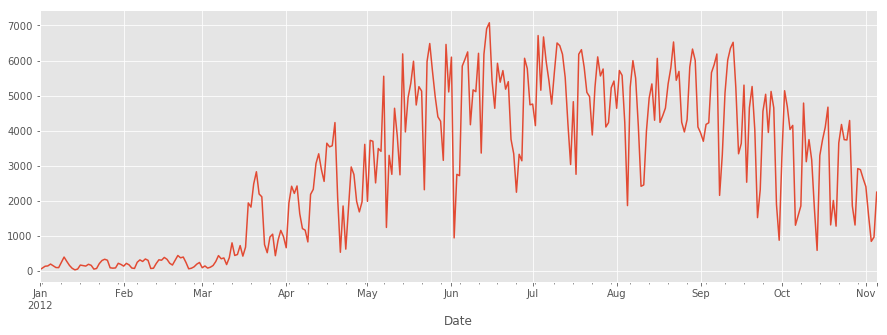

In [42]:
bikes = pd.read_csv(data+'bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()
berri_bikes = bikes[['Berri 1']].copy()

In [25]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Далее, нужно добавить колонку "день недели". Во-первых, мы получим его из первого столбца (индекс). Индекс - это то, что находится левее всего dataframe, под 'Date'. Сейчас это все дни в году.

In [26]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

Некоторые дни пропущены -- здесь только 310 дней.

Pandas имеет набор функционала для работы с промежутками времени, поэтому если мы, например, хотим получить день месяца для каждой строки, то мы можем написать:

In [27]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

Мы хотим день недели, где 0 - понедельник.

In [29]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

 Теперь, когда мы знаем, как получить день недели, мы можем добавить его как столбец в dataframe.

In [30]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


Добавляем велосипедистов Dataframe имеет метод .groupby(), который группирует по одному или нескольким столбцам. Подробнее можно прочесть в документации.

В нашем случае, berri_bikes.groupby('weekday').aggregate(sum) означает "Сгруппировать строки по дню недели и затем сложить все значения с одинаковым днём недели".

In [31]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
# weekday_counts = berri_bikes.groupby('weekday').sum() - можно и так. Даже проще.
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


Теперь переименуем 0, 1, 2, 3, 4, 5, 6, чтобы понимать, что они означают:

In [32]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


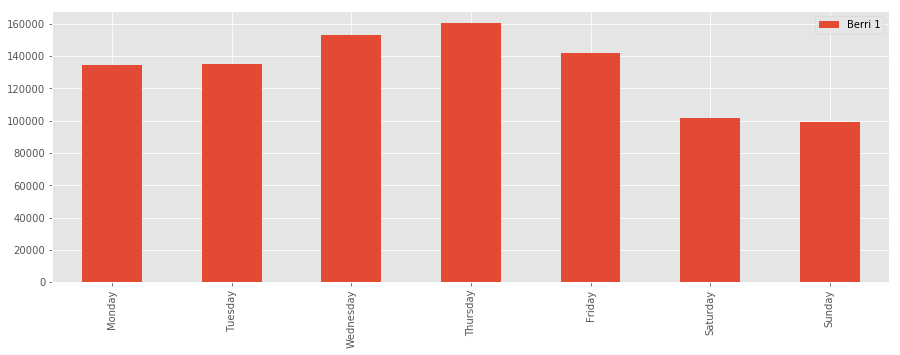

In [33]:
weekday_counts.plot(kind='bar')

В Монреале чаще катаются по будням - здорово!

Соединяем вместе. Всего 6 строк кода!

Если хотите поиграться, попробуйте поменять sum на max, numpy.median, или любую другую функцию на ваш выбор.

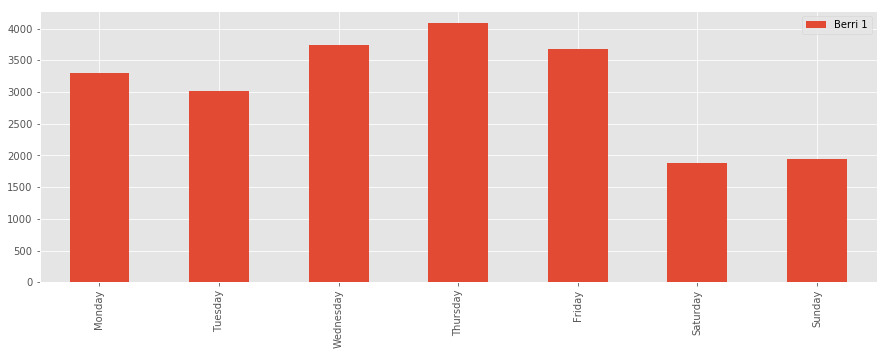

In [80]:
bikes = pd.read_csv(data+'bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(np.median)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

In [70]:
weather = pd.read_csv(data+'eng-daily-01012017-12312017.csv', skiprows=25, index_col='Date/Time', parse_dates=True, encoding='latin1')


In [71]:
weather 


,Year,Month,Day,Data Quality,Max Temp (Â°C),Max Temp Flag,Min Temp (Â°C),Min Temp Flag,Mean Temp (Â°C),Mean Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017,1,1,â¡,1.8,NaN,-2.5,NaN,-0.4,NaN,...,0.0,NaN,0.0,NaN,3.0,NaN,27.0,NaN,50,NaN
2017-01-02,2017,1,2,â¡,4.8,NaN,-4.1,NaN,0.4,NaN,...,0.0,NaN,0.0,T,2.0,NaN,10.0,NaN,35,NaN
2017-01-03,2017,1,3,â¡,4.4,NaN,1.7,NaN,3.1,NaN,...,0.0,NaN,15.8,NaN,0.0,T,NaN,NaN,<31,NaN
2017-01-04,2017,1,4,â¡,3.5,NaN,-8.5,NaN,-2.5,NaN,...,0.0,T,0.2,NaN,0.0,T,27.0,NaN,80,NaN
2017-01-05,2017,1,5,â¡,-6.5,NaN,-11.9,NaN,-9.2,NaN,...,0.0,T,0.0,T,0.0,T,25.0,NaN,56,NaN
2017-01-06,2017,1,6,â¡,-7.3,NaN,-13.4,NaN,-10.4,NaN,...,0.0,NaN,0.0,NaN,0.0,T,26.0,NaN,43,NaN
2017-01-07,2017,1,7,â¡,-7.6,NaN,-14.2,NaN,-10.9,NaN,...,0.0,NaN,0.0,NaN,0.0,T,28.0,NaN,41,NaN
2017-01-08,2017,1,8,â¡,-9.0,NaN,-13.4,NaN,-11.2,NaN,...,0.0,T,0.0,T,0.0,T,25.0,NaN,50,NaN
2017-01-09,2017,1,9,â¡,-2.7,NaN,-9.5,NaN,-6.1,NaN,...,0.0,T,0.0,T,0.0,T,25.0,NaN,57,NaN


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


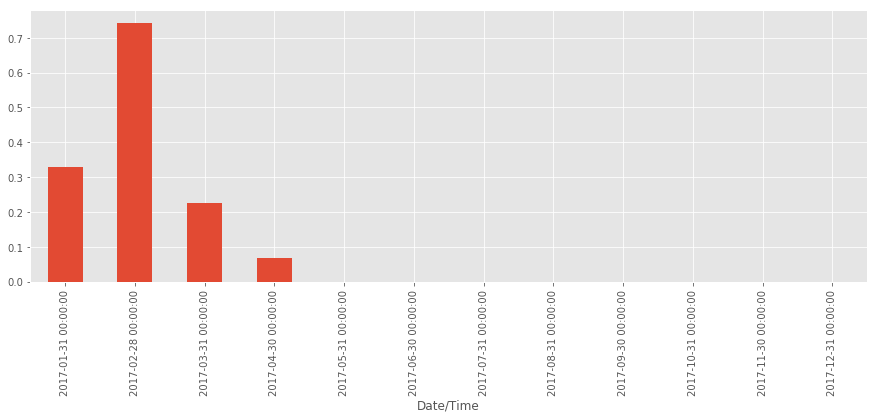

In [88]:
weather['Total Snow (cm)'].resample('M').plot(kind='bar')

In [89]:
A=weather['Min Temp (Â°C)']

Итак у нас теперь есть временной ряд и можно перейти к его анализу.

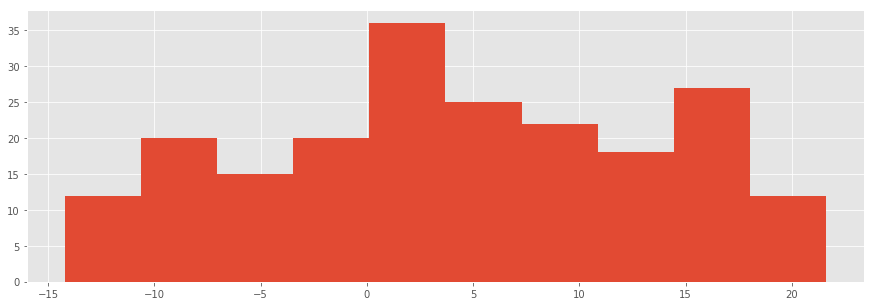

In [92]:
A.hist()

SyntaxError: invalid syntax (<ipython-input-93-ade247ebf60e>, line 1)